In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import folium
from folium import plugins
import geopandas as gpd

In [2]:
vector_data = gpd.read_file('/home/ubuntu/data/sar_ukho/labels_shapefile/labels_shapefile.shp')

In [3]:
vector_data.label.value_counts()

turbine                       1832
oil_and_gas_infrastructure    1714
Name: label, dtype: int64

In [9]:
vector_data

,capture_dt,feature,geometry,id,label,label_id,lat,latitude,lon,longitude,source
0,,Oil/Gas Platform,POINT (48.98874933100007 28.78503614900006),1,oil_and_gas_infrastructure,OG1,28.785036,28.785036,48.988749,48.988749,Gulf plot capture
1,,Oil/Gas Platform,POINT (48.97507372000007 28.74484950200008),10,oil_and_gas_infrastructure,OG10,28.744850,28.744850,48.975074,48.975074,Gulf plot capture
2,,Oil/Gas Platform,POINT (48.77964449900009 28.04989378300007),100,oil_and_gas_infrastructure,OG100,28.049894,28.049894,48.779644,48.779644,Gulf plot capture
3,,Oil/Gas Platform,POINT (52.63746902200006 25.12731450500007),1000,oil_and_gas_infrastructure,OG1000,25.127315,25.127315,52.637469,52.637469,Gulf plot capture
4,,Oil/Gas Platform,POINT (52.58425832500006 24.92540772100006),1001,oil_and_gas_infrastructure,OG1001,24.925408,24.925408,52.584258,52.584258,Gulf plot capture
5,,Oil/Gas Platform,POINT (52.80785865600006 25.14077987500008),1002,oil_and_gas_infrastructure,OG1002,25.140780,25.140780,52.807859,52.807859,Gulf plot capture
6,,Oil/Gas Platform,POINT (52.93644234900006 24.46459654400007),1003,oil_and_gas_infrastructure,OG1003,24.464597,24.464597,52.936442,52.936442,Gulf plot capture
7,,Oil/Gas Platform,POINT (52.94256946100006 24.45864789100006),1004,oil_and_gas_infrastructure,OG1004,24.458648,24.458648,52.942569,52.942569,Gulf plot capture
8,,Oil/Gas Platform,POINT (52.87660921600008 25.17111483000008),1005,oil_and_gas_infrastructure,OG1005,25.171115,25.171115,52.876609,52.876609,Gulf plot capture
9,,Oil/Gas Platform,POINT (52.87339694300005 25.17394044000008),1006,oil_and_gas_infrastructure,OG1006,25.173940,25.173940,52.873397,52.873397,Gulf plot capture


In [2]:
df_train = pd.read_parquet('/home/ubuntu/data/sar_ukho/data.parquet')

In [3]:
df_train.head()

,VH,VV,distance_to_land,incidence_angle,is_padded,label,label_id,lat,lon,product_date,product_id,product_name,water_depth
41A9_145,"[0.007951710373163223, 0.0076957447454333305, ...","[0.047097332775592804, 0.06553711742162704, 0....",8888.1,31.008343,0,turbine,WT1023,54.758711,-3.740372,2017-03-20,41A9,S1A_IW_GRDH_1SDV_20170320T063820_20170320T0638...,-8.0
41A9_105,"[0.0053657349199056625, 0.005551208276301622, ...","[0.014291312545537949, 0.02017802931368351, 0....",5408.9,33.686410,0,other,OT105,54.631061,-4.365689,2017-03-20,41A9,S1A_IW_GRDH_1SDV_20170320T063820_20170320T0638...,-50.0
41A9_60,"[0.001558236894197762, 0.0014708059607073665, ...","[0.03370225802063942, 0.034637004137039185, 0....",1115.0,38.670147,0,other,OT60,54.678761,-5.676601,2017-03-20,41A9,S1A_IW_GRDH_1SDV_20170320T063820_20170320T0638...,-18.0
41A9_74,"[0.0021736545022577047, 0.0026504062116146088,...","[0.07054946571588516, 0.05869099870324135, 0.0...",1424.5,40.215103,0,other,OT74,54.929661,-5.867762,2017-03-20,41A9,S1A_IW_GRDH_1SDV_20170320T063820_20170320T0638...,-50.0
41A9_138,"[0.004740630276501179, 0.00470533175393939, 0....","[0.0447748601436615, 0.035554129630327225, 0.0...",9850.8,31.008343,0,turbine,WT853,54.753052,-3.728963,2017-03-20,41A9,S1A_IW_GRDH_1SDV_20170320T063820_20170320T0638...,-8.0


In [4]:
df_train.label.count()

10449

In [61]:
df_train.label.value_counts()

other                         5437
turbine                       4818
oil_and_gas_infrastructure     194
Name: label, dtype: int64

In [ ]:
df_train.product_id.value_counts()

In [7]:
locations = df_train[['lat', 'lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[54.763742024609584, -3.7216870638945414]

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [58]:
lats = np.array(df_train['lat'])
lons = np.array(df_train['lon'])
# x,y = map(lons, lats)

In [59]:
type(lats)

numpy.ndarray

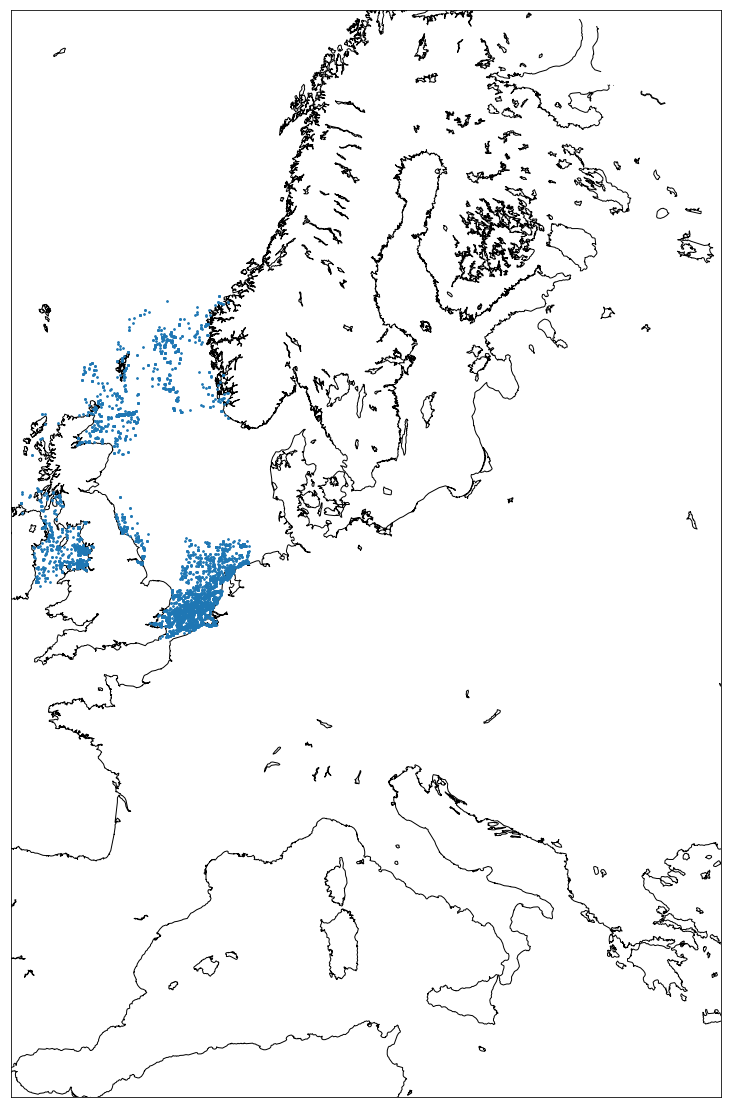

In [63]:
plt.figure(figsize=(30,20))
map = Basemap(llcrnrlon=-5.5,llcrnrlat=35,urcrnrlon=50.,urcrnrlat=64.,
             resolution='i', projection='tmerc', lat_0 = 51.5, lon_0 = -0.12)

map.drawcoastlines()
# map.plot(x,y, 'bo', markersize=2)
# for l in locationlist:
#     map.plot(l[1], l[0], marker='o',color='k')
    
map.scatter(lons, lats,3, zorder=5, latlon=True)
plt.show()

In [ ]:
for i in range(0, 10000000, 1000000):
    map.plot(i, i, marker='o',color='k')

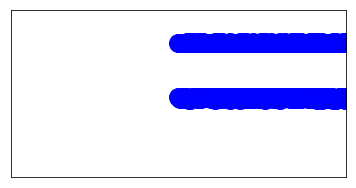

In [17]:
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=18)

plt.show()

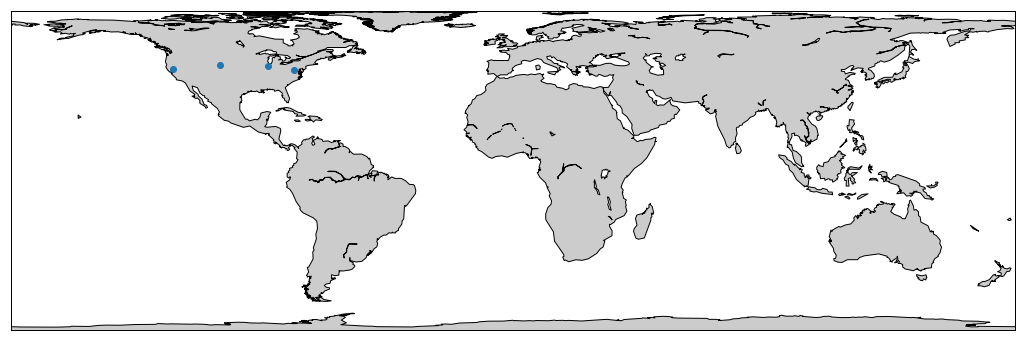

In [49]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

lat = [39.62, 38.97, 40.75, 41.19] 
lon = [-121.76, -78.38, -87.66, -104.91]

fig = plt.figure(figsize=(18,18))
m=Basemap(projection='cea')
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()


m.scatter(lon,lat,zorder=10,latlon=True)